# Fake news detection

A fake news are those stories that are false, manipulated or considered to have no solid proof from reliable sources.

Find the Dataset @: https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

## Read datasets

In [68]:
fake = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Fake_News_Detection/Fake.csv")
true = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Fake_News_Detection/True.csv")

In [35]:
fake.shape

(23481, 4)

In [36]:
true.shape

(21417, 4)

## Data cleaning and preparation

In [37]:
# Adding flag to track fake and real
fake['target'] = 'fake'
true['target'] = 'true'

In [38]:
fake.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


In [39]:
true.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",true
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",true
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",true
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",true
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",true


In [40]:
# Concatenate dataframes
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape

(44898, 5)

In [41]:
data.head(5)

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


In [42]:
data.tail(5)

,title,text,subject,date,target
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",true
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",true
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",true
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",true
44897,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",true


In [43]:
# Shuffle the data
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [44]:
# Check the data
data.head()

,title,text,subject,date,target
0,BLACK LIVES MATTER ORGANIZERS Hacked Messages ...,This is just a preview of what these terrorist...,left-news,"Jul 8, 2016",fake
1,BREAKING: Lithuania Warns That Russia Is Prep...,With their puppet firmly secured in the White ...,News,"February 11, 2017",fake
2,"Pope, at U.S. military cemetery, makes emotion...",ROME (Reuters) - Pope Francis made one of his ...,worldnews,"November 2, 2017",true
3,Happy 2016! Republicans Already Promise To Be...,Well that didn t take long at all did it? 2016...,News,"January 4, 2016",fake
4,"David Icke on The Hillary, Donald & Bernie Show",21st Century Wire says Author David Icke break...,Middle-east,"April 2, 2016",fake


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   target   44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


In [46]:
# Removing the date 
data.drop(["date"],axis=1,inplace=True)
data.head()

,title,text,subject,target
0,BLACK LIVES MATTER ORGANIZERS Hacked Messages ...,This is just a preview of what these terrorist...,left-news,fake
1,BREAKING: Lithuania Warns That Russia Is Prep...,With their puppet firmly secured in the White ...,News,fake
2,"Pope, at U.S. military cemetery, makes emotion...",ROME (Reuters) - Pope Francis made one of his ...,worldnews,true
3,Happy 2016! Republicans Already Promise To Be...,Well that didn t take long at all did it? 2016...,News,fake
4,"David Icke on The Hillary, Donald & Bernie Show",21st Century Wire says Author David Icke break...,Middle-east,fake


In [47]:
# Removing the title
data.drop(["title"],axis=1,inplace=True)
data.head()

,text,subject,target
0,This is just a preview of what these terrorist...,left-news,fake
1,With their puppet firmly secured in the White ...,News,fake
2,ROME (Reuters) - Pope Francis made one of his ...,worldnews,true
3,Well that didn t take long at all did it? 2016...,News,fake
4,21st Century Wire says Author David Icke break...,Middle-east,fake


In [48]:
# Convert to lowercase

data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,target
0,this is just a preview of what these terrorist...,left-news,fake
1,with their puppet firmly secured in the white ...,News,fake
2,rome (reuters) - pope francis made one of his ...,worldnews,true
3,well that didn t take long at all did it? 2016...,News,fake
4,21st century wire says author david icke break...,Middle-east,fake


In [49]:
# Remove punctuation

import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)

In [50]:
# Check
data.head()

,text,subject,target
0,this is just a preview of what these terrorist...,left-news,fake
1,with their puppet firmly secured in the white ...,News,fake
2,rome reuters pope francis made one of his mos...,worldnews,true
3,well that didn t take long at all did it 2016 ...,News,fake
4,21st century wire says author david icke break...,Middle-east,fake


In [51]:
# Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [52]:
data.head()

,text,subject,target
0,preview terrorists professional agitators actu...,left-news,fake
1,puppet firmly secured white house russia poise...,News,fake
2,rome reuters pope francis made one emotional a...,worldnews,true
3,well take long 2016 days old already republica...,News,fake
4,21st century wire says author david icke break...,Middle-east,fake


## Basic data exploration

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


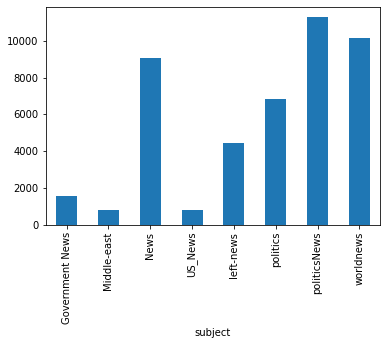

In [53]:
# How many articles per subject?
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

target
fake    23481
true    21417
Name: text, dtype: int64


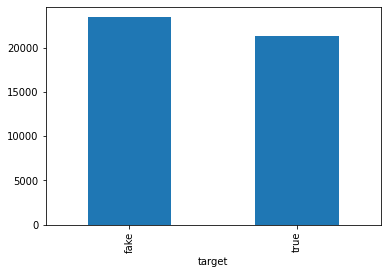

In [54]:
# Print How many fake and real articles?
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

In [55]:
# !pip install wordcloud

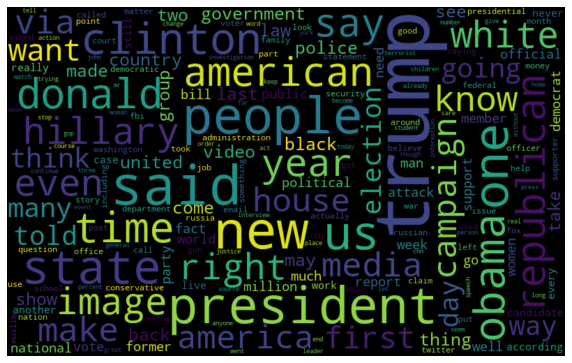

In [56]:
# Word cloud for fake news
from wordcloud import WordCloud

fake_data = data[data["target"] == "fake"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

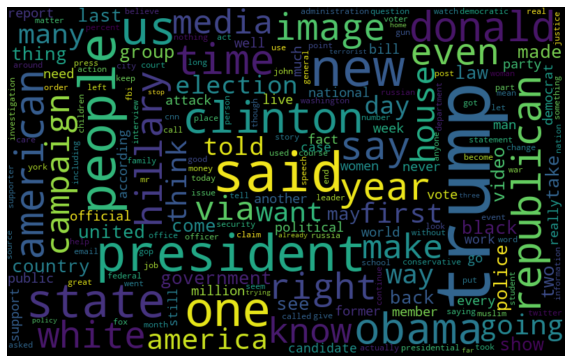

In [57]:
# Word cloud for True/Real news
from wordcloud import WordCloud

real_data = data[data["target"] == "true"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [58]:
# Most frequent words counter   
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

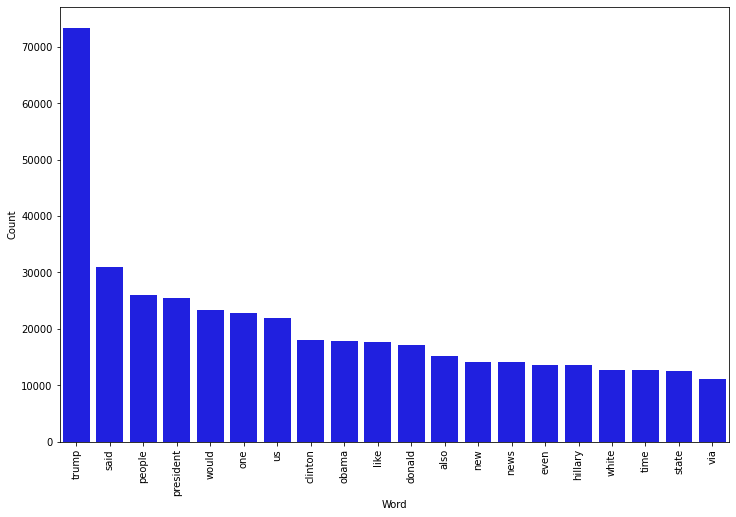

In [59]:
# Count Most frequent words in fake news
counter(data[data["target"] == "fake"], "text", 20)

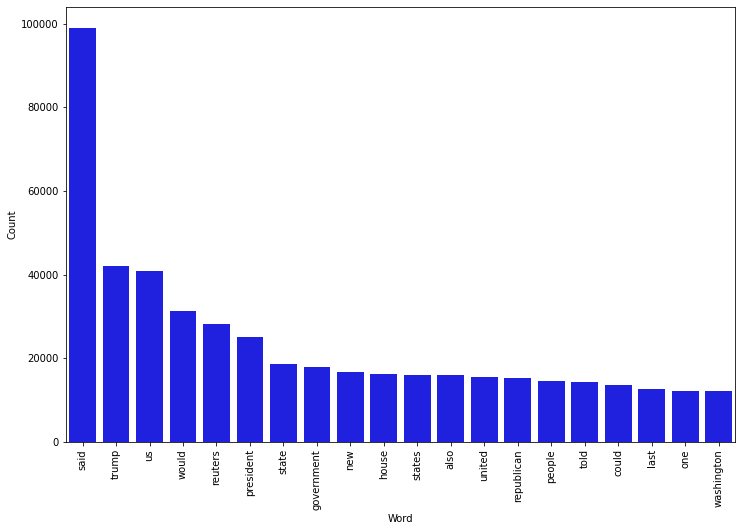

In [60]:
# Count Most frequent words in real news
counter(data[data["target"] == "true"], "text", 20)

## Modeling

In [61]:
# Function to plot the confusion matrix
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Split Data

In [62]:
# Split the data
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)

In [63]:
X_train.head()

36335    washington reuters donald trump pulled one big...
12384    like day go without backwoods rightwing jackas...
24419    republican national convention cleveland ohio ...
24740    geneva reuters us president donald trump “clos...
27039    21st century wire says imagine nations like ch...
Name: text, dtype: object

In [64]:
y_train.head()

36335    true
12384    fake
24419    fake
24740    true
27039    fake
Name: target, dtype: object

### Decision Tree Classifier

In [65]:
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 99.61%


Confusion matrix, without normalization


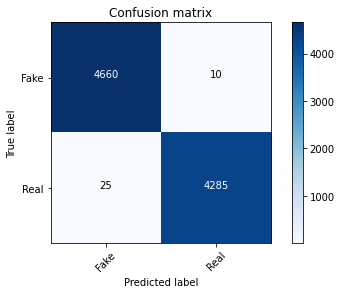

In [66]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])